# Práctica 1 - Regresión

Vamos a trabajar con un conjunto de datos que representa una serie de billetes de renfe. Entre sus parámetros se encuentran:




*   **id**: identificador del billete
*   **company**: empresa
*   **origin**: lugar de salida del tren
*   **destination**: lugar de llegada del tren
*   **departure**: hora de salida del tren
*   **arrival**: hora de llegada del tren
*   **duration**: duración del trayecto
*   **vehicle_type**: tipo de tren
*   **vehicle_class**: clase del pasajero
*   **price**: precio (variable objetivo, a predecir)





In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
test_url = "https://gist.githubusercontent.com/w-dan/a3c63b2aed66a5edd1288c1d3006fc79/raw/9dcc831af941428edad3ef285729e4ef5a63a9fb/renfe-test.csv"
train_url = "https://gist.githubusercontent.com/w-dan/a3c63b2aed66a5edd1288c1d3006fc79/raw/9dcc831af941428edad3ef285729e4ef5a63a9fb/renfe-train.csv"

In [4]:
test = pd.read_csv(test_url)
train = pd.read_csv(train_url)

In [5]:
hehe = train.copy()

In [93]:
train['vehicle_type'].value_counts()

AVE          2209
ALVIA         202
REGIONAL      161
INTERCITY     132
AV City        94
MD-LD          46
AVE-TGV        44
AVE-MD         44
R. EXPRES      34
AVE-LD         34
Name: vehicle_type, dtype: int64

In [67]:
train

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,renfe,MADRID,VALENCIA,2019-06-03 16:05:00,2019-06-03 22:47:00,6.70,REGIONAL,Turista,28.35,Adulto ida,NaN,{},2019-04-11 22:00:09
2996,2997,renfe,MADRID,BARCELONA,2019-04-28 14:30:00,2019-04-28 17:21:00,2.85,AVE,Turista,107.70,Flexible,NaN,{},2019-04-11 22:00:09
2997,2998,renfe,MADRID,BARCELONA,2019-04-28 06:20:00,2019-04-28 09:29:00,3.15,AVE,Turista,49.55,Promo,NaN,{},2019-04-11 22:00:09
2998,2999,renfe,MADRID,BARCELONA,2019-04-28 19:30:00,2019-04-28 22:40:00,3.17,AVE,Turista,85.10,Promo,NaN,{},2019-04-11 22:00:09


In [144]:
hehe = train.copy()

hehe = hehe.drop(['seats'], axis = 1)
hehe = hehe.drop(['company'], axis = 1)
hehe = hehe.drop(['meta'], axis = 1)
hehe = hehe.drop(['departure'], axis = 1)
hehe = hehe.drop(['arrival'], axis = 1)
hehe = hehe.drop(['insert_date'], axis = 1)
hehe = hehe.drop(['vehicle_class'], axis = 1)

hehe = hehe.dropna(axis = 0)

hehe = pd.get_dummies(hehe,prefix=['fare'], columns = ['fare'], drop_first=True)


#hehe[['vehicle_class']] = OrdinalEncoder().fit_transform(hehe[['vehicle_class']])
hehe[['vehicle_type']] = OrdinalEncoder().fit_transform(hehe[['vehicle_type']])
hehe[['origin']] = OrdinalEncoder().fit_transform(hehe[['origin']])
hehe[['destination']] = OrdinalEncoder().fit_transform(hehe[['destination']])

scaler = MinMaxScaler()
hehe[['duration']] = scaler.fit_transform(hehe[['duration']])

y = hehe.pop('price')

hehe

,id,origin,destination,duration,vehicle_type,fare_Flexible,fare_Promo,fare_Promo +
0,1,0.0,0.0,0.183117,2.0,0,1,0
1,2,0.0,0.0,0.170130,5.0,1,0,0
2,3,0.0,0.0,0.150649,2.0,0,1,0
4,5,0.0,0.0,0.107792,2.0,0,1,0
5,6,0.0,0.0,0.150649,2.0,0,1,0
...,...,...,...,...,...,...,...,...
2995,2996,0.0,2.0,0.653247,9.0,0,0,0
2996,2997,0.0,0.0,0.153247,2.0,1,0,0
2997,2998,0.0,0.0,0.192208,2.0,0,1,0
2998,2999,0.0,0.0,0.194805,2.0,0,1,0


In [153]:
hehe_test = test.copy()

hehe_test = hehe_test.drop(['vehicle_class'], axis = 1)
hehe_test = hehe_test.drop(['company'], axis = 1)
hehe_test = hehe_test.drop(['seats'], axis = 1)
hehe_test = hehe_test.drop(['meta'], axis = 1)
hehe_test = hehe_test.drop(['departure'], axis = 1)
hehe_test = hehe_test.drop(['arrival'], axis = 1)
hehe_test = hehe_test.drop(['insert_date'], axis = 1)

hehe_test = hehe_test.dropna(axis = 0)

hehe_test = pd.get_dummies(hehe_test,prefix=['fare'], columns = ['fare'], drop_first=True)

#hehe_test[['vehicle_class']] = OrdinalEncoder().fit_transform(hehe_test[['vehicle_class']])
hehe_test[['vehicle_type']] = OrdinalEncoder().fit_transform(hehe_test[['vehicle_type']])
hehe_test[['origin']] = OrdinalEncoder().fit_transform(hehe_test[['origin']])
hehe_test[['destination']] = OrdinalEncoder().fit_transform(hehe_test[['destination']])

scaler = MinMaxScaler()
hehe_test[['duration']] = scaler.fit_transform(hehe_test[['duration']])
y_test = hehe_test.pop('price')

hehe_test

,id,origin,destination,duration,vehicle_type,fare_Flexible,fare_Promo,fare_Promo +
0,3002,0.0,0.0,0.140260,2.0,0,1,0
1,3003,0.0,0.0,0.107792,2.0,0,1,0
2,3004,0.0,0.0,0.181818,2.0,0,1,0
3,3005,0.0,2.0,0.655844,9.0,0,0,0
4,3006,0.0,0.0,0.140260,2.0,0,1,0
...,...,...,...,...,...,...,...,...
1990,4992,0.0,0.0,0.140260,2.0,0,1,0
1993,4995,0.0,0.0,0.170130,5.0,1,0,0
1994,4996,0.0,0.0,0.140260,2.0,1,0,0
1995,4997,0.0,0.0,0.140260,2.0,1,0,0


In [147]:
reg = linear_model.LinearRegression()
reg.fit(hehe, y)
reg.coef_

array([ 3.76046245e-06, -1.42108547e-14, -2.32683403e+01, -6.10691616e+01,
       -4.50925110e-01, -2.89301670e-02, -2.63308124e+01, -1.80929157e-01])

In [148]:
y_pred = reg.predict(hehe_test)

In [149]:
pd.DataFrame(y_pred)

,0
0,80.144546
1,82.127315
2,77.606615
3,25.295906
4,80.144561
...,...
1809,80.152030
1810,103.277004
1811,106.453927
1812,106.453931


In [150]:
y_test

0        75.40
1       115.65
2        90.50
3        28.35
4        85.10
         ...  
1990     85.10
1993    107.70
1994    107.70
1995    107.70
1996    107.70
Name: price, Length: 1814, dtype: float64

In [151]:
a = abs(y_pred - np.array(y_test))
#list(a)

In [152]:
np.mean(a)

10.132162019696782

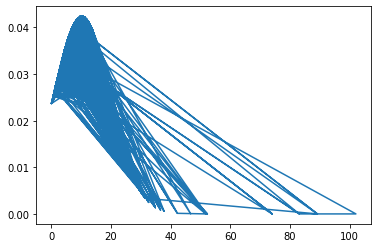

In [63]:
from scipy.stats import norm

mean = np.mean(a)
sd = np.std(a)

plt.plot(a, norm.pdf(a, mean, sd))
plt.show()